### MMCV와 MMDetection 설치

In [ ]:
!pip install mmcv-full
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

     |████████████████████████████████| 185 kB 42.4 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.14-cp37-cp37m-linux_x86_64.whl size=31469111 sha256=55f446917c7b49047e4ccb554ce29e567abd8434b31dc7ee6f34c9ea6d7b09de
  Stored in directory: /root/.cache/pip/wheels/5e/54/62/69c99dc3c9937bca64126f81cbe315ae6c8e6e98c43fa7392d
Successfully built mmcv-full
Cloning into 'mmdetection'...
remote: Enumerating objects: 21083, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 21083 (delta 13), reused 42 (delta 5), pack-reused 21016
Receiving objects: 100% (21083/21083), 24.83 MiB | 23.22 MiB/s, done.
Resolving deltas: 100% (14708/14708), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writ

### import - 런타임 다시 시작(초기화 x)

In [ ]:
from mmdet.apis import init_detector, inference_detector
import mmcv

### PASCAL VOC형태의 BCCD Dataset를 Download 후 MS-COCO 형태로 변경
* BCCD Dataset은 백혈구(WBC), 적혈구(RBC), 혈소판(Platelets) 세가지 유형의 Object Class를 가짐.
* 다운로드 받은 Dataset은 Pascal VOC 형태이므로 이를 별도의 유틸리티를 이용하여 MS-COCO 형태로 변환 

In [ ]:
!mkdir data

In [ ]:
!cd ./data; git clone https://github.com/Shenggan/BCCD_Dataset.git

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 7.39 MiB | 22.12 MiB/s, done.
Resolving deltas: 100% (378/378), done.


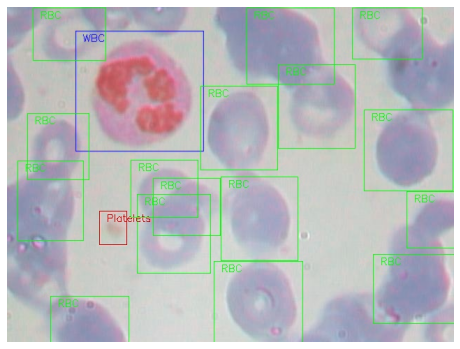

In [ ]:
import cv2
import matplotlib.pyplot as plt

example_img = cv2.imread('./data/BCCD_Dataset/example.jpg', cv2.COLOR_BGR2RGB)
example_img = cv2.cvtColor(example_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (8,8))
plt.imshow(example_img)
plt.axis('off')
plt.show()

### VOC를 COCO로 변환하는 package적용하기
* https://github.com/yukkyo/voc2coco.git
* 이 깃헙에 가면 사용 방법이 나와있음
* 이 py 파일을 사용해서 xml 파일을 json 파일로 바꿀 수 있다.

In [ ]:
!git clone https://github.com/yukkyo/voc2coco.git

Cloning into 'voc2coco'...
remote: Enumerating objects: 423, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 423 (delta 3), reused 8 (delta 3), pack-reused 409
Receiving objects: 100% (423/423), 214.64 KiB | 2.94 MiB/s, done.
Resolving deltas: 100% (379/379), done.


* Label 텍스트 만들기
* xml파일을 json으로 바꾸기 위해서 필요한 파일

In [ ]:
import os

with open('./data/BCCD_Dataset/labels.txt','w') as f:
    f.write("WBC\n")
    f.write("RBC\n")
    f.write("Platelets\n")

!cat ./data/BCCD_Dataset/labels.txt

WBC
RBC
Platelets


In [ ]:
!ls -ail

total 28
3408546 drwxr-xr-x  1 root root 4096 Sep 29 03:10 .
4478377 drwxr-xr-x  1 root root 4096 Sep 29 02:48 ..
3539019 drwxr-xr-x  4 root root 4096 Sep 16 13:39 .config
4604548 drwxr-xr-x  3 root root 4096 Sep 29 03:10 data
4587523 drwxr-xr-x 18 root root 4096 Sep 29 03:10 mmdetection
3408547 drwxr-xr-x  1 root root 4096 Sep 16 13:40 sample_data
4605343 drwxr-xr-x  4 root root 4096 Sep 29 03:10 voc2coco


In [ ]:
!python ./voc2coco/voc2coco.py --ann_dir ./data/BCCD_Dataset/BCCD/Annotations/ \
--ann_ids ./data/BCCD_Dataset/BCCD/ImageSets/Main/train.txt \
--labels ./data/BCCD_Dataset/labels.txt \
--output ./data/BCCD_Dataset/BCCD/train.json \
--ext xml

!python ./voc2coco/voc2coco.py --ann_dir ./data/BCCD_Dataset/BCCD/Annotations/ \
--ann_ids ./data/BCCD_Dataset/BCCD/ImageSets/Main/val.txt \
--labels ./data/BCCD_Dataset/labels.txt \
--output ./data/BCCD_Dataset/BCCD/val.json \
--ext xml

!python ./voc2coco/voc2coco.py --ann_dir ./data/BCCD_Dataset/BCCD/Annotations/ \
--ann_ids ./data/BCCD_Dataset/BCCD/ImageSets/Main/test.txt \
--labels ./data/BCCD_Dataset/labels.txt \
--output ./data/BCCD_Dataset/BCCD/test.json \
--ext xml

Start converting !
100% 205/205 [00:00<00:00, 3493.98it/s]
Start converting !
100% 87/87 [00:00<00:00, 4349.07it/s]
Start converting !
100% 72/72 [00:00<00:00, 2552.85it/s]


* 잘 바뀌었는지 확인

In [ ]:
!cat ./data/BCCD_Dataset/BCCD/train.json

{"images": [{"file_name": "BloodImage_00001.jpg", "height": 480, "width": 640, "id": "BloodImage_00001"}, {"file_name": "BloodImage_00003.jpg", "height": 480, "width": 640, "id": "BloodImage_00003"}, {"file_name": "BloodImage_00004.jpg", "height": 480, "width": 640, "id": "BloodImage_00004"}, {"file_name": "BloodImage_00005.jpg", "height": 480, "width": 640, "id": "BloodImage_00005"}, {"file_name": "BloodImage_00006.jpg", "height": 480, "width": 640, "id": "BloodImage_00006"}, {"file_name": "BloodImage_00008.jpg", "height": 480, "width": 640, "id": "BloodImage_00008"}, {"file_name": "BloodImage_00009.jpg", "height": 480, "width": 640, "id": "BloodImage_00009"}, {"file_name": "BloodImage_00010.jpg", "height": 480, "width": 640, "id": "BloodImage_00010"}, {"file_name": "BloodImage_00012.jpg", "height": 480, "width": 640, "id": "BloodImage_00012"}, {"file_name": "BloodImage_00013.jpg", "height": 480, "width": 640, "id": "BloodImage_00013"}, {"file_name": "BloodImage_00020.jpg", "height": 

In [ ]:
# annotation json 파일을 잘 볼수 있는 jq 유틸리티 셋업. 
!sudo apt-get install jq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libjq1 libonig4
The following NEW packages will be installed:
  jq libjq1 libonig4
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 276 kB of archives.
After this operation, 930 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libonig4 amd64 6.7.0-1 [119 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libjq1 amd64 1.5+dfsg-2 [111 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 jq amd64 1.5+dfsg-2 [45.6 kB]
Fetched 276 kB in 1s (331 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize fron

In [ ]:
!jq . ./data/BCCD_Dataset/BCCD/train.json > output.json
!tail -100 output.json

      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2800
    },
    {
      "area": 9405,
      "iscrowd": 0,
      "bbox": [
        102,
        0,
        99,
        95
      ],
      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2801
    },
    {
      "area": 7128,
      "iscrowd": 0,
      "bbox": [
        197,
        0,
        88,
        81
      ],
      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2802
    },
    {
      "area": 756,
      "iscrowd": 0,
      "bbox": [
        0,
        280,
        21,
        36
      ],
      "category_id": 3,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2803
    },
    {
      "area": 1302,
      "iscrowd": 0,
      "bbox": [
        382,
        253,
        42,
        31
      ],
   

In [ ]:
!jq . ./data/BCCD_Dataset/BCCD/test.json > output.json
!cat output.json

{
  "images": [
    {
      "file_name": "BloodImage_00007.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00007"
    },
    {
      "file_name": "BloodImage_00011.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00011"
    },
    {
      "file_name": "BloodImage_00015.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00015"
    },
    {
      "file_name": "BloodImage_00016.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00016"
    },
    {
      "file_name": "BloodImage_00018.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00018"
    },
    {
      "file_name": "BloodImage_00019.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00019"
    },
    {
      "file_name": "BloodImage_00021.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00021"
    },
    {
      "file_name": "BloodImage_00031.jpg",
      "height": 480,
      "width": 640

### CocoDataset 클래스를 활용하여 BCCD Dataset을 로딩하기
* MS-COCO Dataset의 경우 별다른 Custom Code없이 Object들의 Class만 지정해 주면 됨

In [ ]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

# middle dataset 만드는 방법
# mmdet은 MS COCO를 정말 좋아하는 듯 ... 
# 간단하게 만들 수 있다.
@DATASETS.register_module(force=True)
class BCCDDataset(CocoDataset):
    CLASSES = ('WBC', 'RBC', 'Platelets')

### Config 설정하고 Checkpoint 파일 다운로드 받기

In [ ]:
!cd /content/mmdetection; mkdir checkpoints
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2021-09-29 03:11:31--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  8.84MB/s    in 18s     

2021-09-29 03:11:50 (8.79 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [ ]:
!ls -lia /content/mmdetection/checkpoints

total 163376
4718649 drwxr-xr-x  2 root root      4096 Sep 29 03:11 .
4587523 drwxr-xr-x 19 root root      4096 Sep 29 03:11 ..
4718650 -rw-r--r--  1 root root 167287506 Aug 28  2020 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [ ]:
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [ ]:
!pwd

/content


In [ ]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [ ]:
# 구글 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd /content/drive/MyDrive/Colab_Notebooks; mkdir bccd_dir

mkdir: cannot create directory ‘bccd_dir’: File exists


In [ ]:
from mmdet.apis import set_random_seed

# Train, Val, Test Dataset에 대한 setting
cfg.dataset_type = 'BCCDDataset'
cfg.data_root = '/content/data/BCCD_Dataset/BCCD/'

cfg.data.train.type = 'BCCDDataset'
cfg.data.train.data_root = '/content/data/BCCD_Dataset/BCCD/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = 'JPEGImages'

cfg.data.val.type = 'BCCDDataset'
cfg.data.val.data_root = '/content/data/BCCD_Dataset/BCCD/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = 'JPEGImages'

cfg.data.test.type = 'BCCDDataset'
cfg.data.test.data_root = '/content/data/BCCD_Dataset/BCCD/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'JPEGImages'

# Class 개수 설정
cfg.model.roi_head.bbox_head.num_classes = 3

# Pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 저장할 디렉토리
cfg.work_dir = '/content/drive/MyDrive/Colab_Notebooks/bccd_dir'

cfg.optimizer.lr = 0.02 / 8
cfg.lr_config = None
cfg.log_config.interval = 10

cfg.evaluation.metric = 'bbox' # PASCAL VOC랑은 다르게 MS COCO 형식의 데이터 셋은 bbox로 수행
cfg.evaluation.interval = 10
cfg.checkpoint_config.interval = 10 # Epochs를 줄일시 몇 주기마다 checkpoint 파일을 저장할지 추가 설정하면 된다.
cfg.runner.max_epochs=50 # 너무 오래 걸린다 싶으면 Epochs를 줄여도됨

cfg.log_config.policy='step'

cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

In [ ]:
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

### Dataset을 만들고 모델 학습 및 Inference 적용

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

datasets = [build_dataset(cfg.data.train)]

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
datasets[0]


BCCDDataset Train dataset with number of images 205, and instance counts: 
+----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+
| category | count | category | count | category      | count | category | count | category | count |
+----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+
|          |       |          |       |               |       |          |       |          |       |
| 0 [WBC]  | 214   | 1 [RBC]  | 2382  | 2 [Platelets] | 209   |          |       |          |       |
+----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+

In [ ]:
datasets[0].cat2label

{1: 0, 2: 1, 3: 2}

In [ ]:
datasets[0].CLASSES

('WBC', 'RBC', 'Platelets')

In [ ]:
# datasets[0].__dict__ 로 모든 self variables의 key와 value값을 볼 수 있음. 
datasets[0].__dict__.keys()

dict_keys(['ann_file', 'data_root', 'img_prefix', 'seg_prefix', 'proposal_file', 'test_mode', 'filter_empty_gt', 'CLASSES', 'coco', 'cat_ids', 'cat2label', 'img_ids', 'data_infos', 'proposals', 'flag', 'pipeline'])

In [ ]:
datasets[0].data_infos

[{'file_name': 'BloodImage_00001.jpg',
  'filename': 'BloodImage_00001.jpg',
  'height': 480,
  'id': 'BloodImage_00001',
  'width': 640},
 {'file_name': 'BloodImage_00003.jpg',
  'filename': 'BloodImage_00003.jpg',
  'height': 480,
  'id': 'BloodImage_00003',
  'width': 640},
 {'file_name': 'BloodImage_00004.jpg',
  'filename': 'BloodImage_00004.jpg',
  'height': 480,
  'id': 'BloodImage_00004',
  'width': 640},
 {'file_name': 'BloodImage_00005.jpg',
  'filename': 'BloodImage_00005.jpg',
  'height': 480,
  'id': 'BloodImage_00005',
  'width': 640},
 {'file_name': 'BloodImage_00006.jpg',
  'filename': 'BloodImage_00006.jpg',
  'height': 480,
  'id': 'BloodImage_00006',
  'width': 640},
 {'file_name': 'BloodImage_00008.jpg',
  'filename': 'BloodImage_00008.jpg',
  'height': 480,
  'id': 'BloodImage_00008',
  'width': 640},
 {'file_name': 'BloodImage_00009.jpg',
  'filename': 'BloodImage_00009.jpg',
  'height': 480,
  'id': 'BloodImage_00009',
  'width': 640},
 {'file_name': 'BloodImage_

In [ ]:
datasets[0].pipeline # mmdetectiom에서 자동으로 수행하는 이미지 전처리 과정

Compose(
    LoadImageFromFile(to_float32=False, color_type='color', file_client_args={'backend': 'disk'})
    LoadAnnotations(with_bbox=True, with_label=True, with_mask=False, with_seg=False, poly2mask=True, poly2mask={'backend': 'disk'})
    Resize(img_scale=[(1333, 800)], multiscale_mode=range, ratio_range=None, keep_ratio=True, bbox_clip_border=True)
    RandomFlip(flip_ratio=0.5)
    Normalize(mean=[123.675 116.28  103.53 ], std=[58.395 57.12  57.375], to_rgb=True)
    Pad(size=None, size_divisor=32, pad_to_square=False, pad_val=0)
    DefaultFormatBundle
    Collect(keys=['img', 'gt_bboxes', 'gt_labels'], meta_keys=('filename', 'ori_filename', 'ori_shape', 'img_shape', 'pad_shape', 'scale_factor', 'flip', 'flip_direction', 'img_norm_cfg'))
)

In [ ]:
# 모델 만들기
model = build_detector(cfg.model, train_cfg = cfg.get('train.cfg'), test_cfg = cfg.get('test.cfg'))
model.CLASSES = datasets[0].CLASSES
print(model.CLASSES)

('WBC', 'RBC', 'Platelets')


/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


In [ ]:
import os.path as osp
import mmcv

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

# 모델 학습 시키기
# 대략 2시간 20분정도 시간이 소요됨 -> 느림 ... 
train_detector(model, datasets, cfg, distributed = False, validate=True)

2021-09-29 00:05:41,587 - mmdet - INFO - load checkpoint from /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2021-09-29 00:05:41,588 - mmdet - INFO - Use load_from_local loader


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2021-09-29 00:05:41,861 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([12, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([12]).
2021-09-29 00:05:41,870 - mmdet - INFO - Start running, host: root@7d03d32fb6a7, work_dir: /content/drive/MyDrive/Colab_Notebooks/bccd_dir
2021-09-29 00:05:41,872 - mmdet - INFO - Hooks will be executed in the following order:
before_run:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 87/87, 2.9 task/s, elapsed: 30s, ETA:     0s

2021-09-29 00:31:38,604 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-09-29 00:31:39,603 - mmdet - INFO - Epoch(val) [10][87]	bbox_mAP: 0.6150, bbox_mAP_50: 0.9000, bbox_mAP_75: 0.6950, bbox_mAP_s: 0.1500, bbox_mAP_m: 0.4930, bbox_mAP_l: 0.7150, bbox_mAP_copypaste: 0.615 0.900 0.695 0.150 0.493 0.715


DONE (t=0.88s).
Accumulating evaluation results...
DONE (t=0.09s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.615
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.900
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.695
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.493
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.715
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.706
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.706
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.706
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.164
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.622
 Average Recall     (AR) @[ IoU=0.50:0.95 | a

2021-09-29 00:31:56,721 - mmdet - INFO - Epoch [11][10/103]	lr: 2.500e-03, eta: 1:38:35, time: 1.676, data_time: 0.233, memory: 3166, loss_rpn_cls: 0.0058, loss_rpn_bbox: 0.0472, loss_cls: 0.1640, acc: 92.8125, loss_bbox: 0.2573, loss: 0.4743
2021-09-29 00:32:11,319 - mmdet - INFO - Epoch [11][20/103]	lr: 2.500e-03, eta: 1:38:22, time: 1.460, data_time: 0.044, memory: 3166, loss_rpn_cls: 0.0057, loss_rpn_bbox: 0.0373, loss_cls: 0.1790, acc: 92.5195, loss_bbox: 0.2343, loss: 0.4563
2021-09-29 00:32:25,983 - mmdet - INFO - Epoch [11][30/103]	lr: 2.500e-03, eta: 1:38:08, time: 1.466, data_time: 0.044, memory: 3166, loss_rpn_cls: 0.0074, loss_rpn_bbox: 0.0466, loss_cls: 0.1928, acc: 91.5137, loss_bbox: 0.2477, loss: 0.4945
2021-09-29 00:32:40,612 - mmdet - INFO - Epoch [11][40/103]	lr: 2.500e-03, eta: 1:37:55, time: 1.463, data_time: 0.045, memory: 3166, loss_rpn_cls: 0.0094, loss_rpn_bbox: 0.0488, loss_cls: 0.2002, acc: 91.4258, loss_bbox: 0.2526, loss: 0.5110
2021-09-29 00:32:55,214 - mm

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 87/87, 2.9 task/s, elapsed: 30s, ETA:     0s

2021-09-29 00:57:42,834 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-09-29 00:57:43,736 - mmdet - INFO - Epoch(val) [20][87]	bbox_mAP: 0.6020, bbox_mAP_50: 0.8830, bbox_mAP_75: 0.6790, bbox_mAP_s: 0.1370, bbox_mAP_m: 0.4660, bbox_mAP_l: 0.7050, bbox_mAP_copypaste: 0.602 0.883 0.679 0.137 0.466 0.705


DONE (t=0.80s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.602
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.883
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.679
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.466
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.705
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.689
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.689
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.689
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.588
 Average Recall     (AR) @[ IoU=0.50:0.95 | a

2021-09-29 00:58:00,712 - mmdet - INFO - Epoch [21][10/103]	lr: 2.500e-03, eta: 1:13:59, time: 1.663, data_time: 0.232, memory: 3166, loss_rpn_cls: 0.0024, loss_rpn_bbox: 0.0330, loss_cls: 0.0929, acc: 96.1719, loss_bbox: 0.1933, loss: 0.3217
2021-09-29 00:58:15,348 - mmdet - INFO - Epoch [21][20/103]	lr: 2.500e-03, eta: 1:13:44, time: 1.463, data_time: 0.044, memory: 3166, loss_rpn_cls: 0.0028, loss_rpn_bbox: 0.0325, loss_cls: 0.0895, acc: 96.2012, loss_bbox: 0.1783, loss: 0.3031
2021-09-29 00:58:30,015 - mmdet - INFO - Epoch [21][30/103]	lr: 2.500e-03, eta: 1:13:30, time: 1.467, data_time: 0.046, memory: 3166, loss_rpn_cls: 0.0051, loss_rpn_bbox: 0.0392, loss_cls: 0.1118, acc: 95.4004, loss_bbox: 0.2073, loss: 0.3633
2021-09-29 00:58:44,731 - mmdet - INFO - Epoch [21][40/103]	lr: 2.500e-03, eta: 1:13:16, time: 1.472, data_time: 0.044, memory: 3166, loss_rpn_cls: 0.0058, loss_rpn_bbox: 0.0417, loss_cls: 0.1316, acc: 94.3066, loss_bbox: 0.2106, loss: 0.3897
2021-09-29 00:58:59,394 - mm

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 87/87, 2.9 task/s, elapsed: 30s, ETA:     0s

2021-09-29 01:23:43,188 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-09-29 01:23:44,035 - mmdet - INFO - Epoch(val) [30][87]	bbox_mAP: 0.5680, bbox_mAP_50: 0.8620, bbox_mAP_75: 0.6430, bbox_mAP_s: 0.1090, bbox_mAP_m: 0.4220, bbox_mAP_l: 0.6690, bbox_mAP_copypaste: 0.568 0.862 0.643 0.109 0.422 0.669


DONE (t=0.75s).
Accumulating evaluation results...
DONE (t=0.07s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.568
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.862
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.643
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.109
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.422
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.669
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.658
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.658
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.658
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.536
 Average Recall     (AR) @[ IoU=0.50:0.95 | a

2021-09-29 01:24:01,024 - mmdet - INFO - Epoch [31][10/103]	lr: 2.500e-03, eta: 0:49:13, time: 1.663, data_time: 0.233, memory: 3166, loss_rpn_cls: 0.0015, loss_rpn_bbox: 0.0254, loss_cls: 0.0609, acc: 97.5000, loss_bbox: 0.1519, loss: 0.2397
2021-09-29 01:24:15,621 - mmdet - INFO - Epoch [31][20/103]	lr: 2.500e-03, eta: 0:48:59, time: 1.459, data_time: 0.044, memory: 3166, loss_rpn_cls: 0.0011, loss_rpn_bbox: 0.0353, loss_cls: 0.0675, acc: 97.2168, loss_bbox: 0.1775, loss: 0.2814
2021-09-29 01:24:30,234 - mmdet - INFO - Epoch [31][30/103]	lr: 2.500e-03, eta: 0:48:44, time: 1.462, data_time: 0.047, memory: 3166, loss_rpn_cls: 0.0020, loss_rpn_bbox: 0.0348, loss_cls: 0.0654, acc: 97.3438, loss_bbox: 0.1654, loss: 0.2676
2021-09-29 01:24:44,838 - mmdet - INFO - Epoch [31][40/103]	lr: 2.500e-03, eta: 0:48:30, time: 1.460, data_time: 0.043, memory: 3166, loss_rpn_cls: 0.0013, loss_rpn_bbox: 0.0315, loss_cls: 0.0624, acc: 97.5391, loss_bbox: 0.1582, loss: 0.2534
2021-09-29 01:24:59,452 - mm

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 87/87, 2.9 task/s, elapsed: 31s, ETA:     0s

2021-09-29 01:49:42,924 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-09-29 01:49:43,694 - mmdet - INFO - Epoch(val) [40][87]	bbox_mAP: 0.5620, bbox_mAP_50: 0.8530, bbox_mAP_75: 0.6110, bbox_mAP_s: 0.1540, bbox_mAP_m: 0.3890, bbox_mAP_l: 0.6800, bbox_mAP_copypaste: 0.562 0.853 0.611 0.154 0.389 0.680


DONE (t=0.68s).
Accumulating evaluation results...
DONE (t=0.07s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.562
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.853
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.611
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.154
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.389
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.680
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.643
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.643
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.643
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.494
 Average Recall     (AR) @[ IoU=0.50:0.95 | a

2021-09-29 01:50:00,684 - mmdet - INFO - Epoch [41][10/103]	lr: 2.500e-03, eta: 0:24:29, time: 1.664, data_time: 0.232, memory: 3166, loss_rpn_cls: 0.0008, loss_rpn_bbox: 0.0285, loss_cls: 0.0503, acc: 97.8613, loss_bbox: 0.1204, loss: 0.2000
2021-09-29 01:50:15,291 - mmdet - INFO - Epoch [41][20/103]	lr: 2.500e-03, eta: 0:24:14, time: 1.460, data_time: 0.043, memory: 3166, loss_rpn_cls: 0.0012, loss_rpn_bbox: 0.0303, loss_cls: 0.0482, acc: 97.8809, loss_bbox: 0.1334, loss: 0.2131
2021-09-29 01:50:29,882 - mmdet - INFO - Epoch [41][30/103]	lr: 2.500e-03, eta: 0:24:00, time: 1.459, data_time: 0.045, memory: 3166, loss_rpn_cls: 0.0017, loss_rpn_bbox: 0.0255, loss_cls: 0.0489, acc: 98.0957, loss_bbox: 0.1337, loss: 0.2098
2021-09-29 01:50:44,497 - mmdet - INFO - Epoch [41][40/103]	lr: 2.500e-03, eta: 0:23:46, time: 1.461, data_time: 0.044, memory: 3166, loss_rpn_cls: 0.0018, loss_rpn_bbox: 0.0243, loss_cls: 0.0471, acc: 98.0176, loss_bbox: 0.1322, loss: 0.2054
2021-09-29 01:50:59,136 - mm

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 87/87, 2.9 task/s, elapsed: 31s, ETA:     0s

2021-09-29 02:15:41,059 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-09-29 02:15:41,868 - mmdet - INFO - Epoch(val) [50][87]	bbox_mAP: 0.5740, bbox_mAP_50: 0.8610, bbox_mAP_75: 0.6260, bbox_mAP_s: 0.1430, bbox_mAP_m: 0.4070, bbox_mAP_l: 0.6850, bbox_mAP_copypaste: 0.574 0.861 0.626 0.143 0.407 0.685


DONE (t=0.71s).
Accumulating evaluation results...
DONE (t=0.07s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.574
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.861
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.626
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.407
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.685
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.654
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.654
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.654
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.164
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.515
 Average Recall     (AR) @[ IoU=0.50:0.95 | a

### 학습결과 확인하기

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


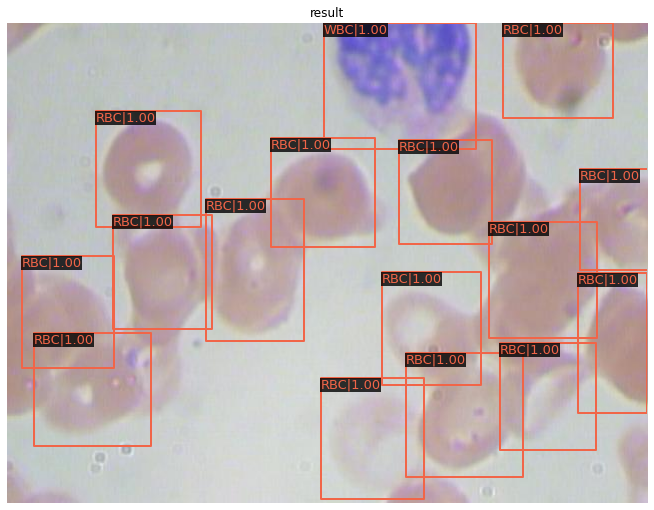

In [ ]:
import cv2
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

img = cv2.imread('./data/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00024.jpg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result)

In [ ]:
#Config file save 
cfg.dump('/content/drive/MyDrive/Colab_Notebooks/bccd_dir/bccd_faster_rcnn_conf_batch_size_2.py')

### 학습시키고 저장한 모델을 불러와 inference 하기

In [ ]:
config_file = '/content/drive/MyDrive/Colab_Notebooks/bccd_dir/bccd_faster_rcnn_conf_batch_size_2.py'
checkpoint_file = '/content/drive/MyDrive/Colab_Notebooks/bccd_dir/epoch_50.pth'

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


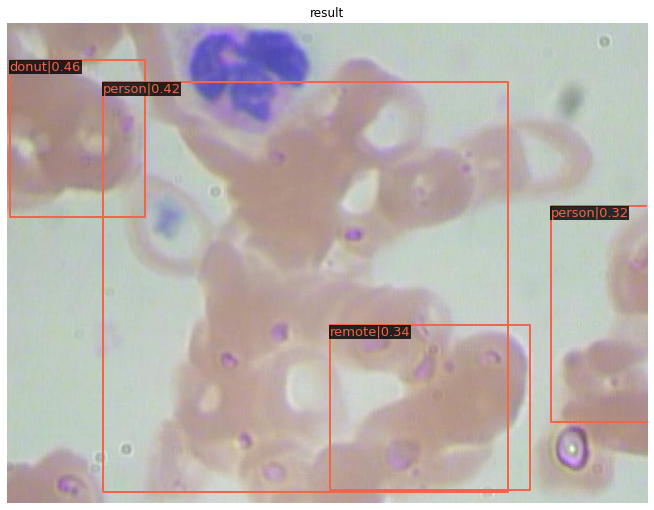

In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

img = cv2.imread('./data/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00050.jpg')

model_ckpt = init_detector(checkpoint=checkpoint_file, config=config_file, device='cuda:0')

results = inference_detector(model=model_ckpt, imgs=img)

show_result_pyplot(model=model_ckpt, img=img, result=results)

### 테스트 데이터 세트에 Inference 및 Evaluation 적용하기 -> 런타임 다시 시작필요
* 런타임 다시 시작 수행 필요(버그?)
* tools/test.py 스크립트는 colab에서 오류 발생 -> 현재 Colab에서는 사용 불가
* 테스트용 Dataset과 DataLoader생성하고 single_gpu_test()를 호출하여 inference 결과를 반환. batch_size를 1로 설정하지 않으면 single_gpu_test() 오류 발생. 

* https://github.com/open-mmlab/mmdetection/blob/master/tools/test.py에 있는 코드를 가져와서 평가를 수행

* Config 파일 재설정 필요함

In [ ]:
from mmcv import Config
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [ ]:
from mmdet.apis import set_random_seed

# Train, Val, Test Dataset에 대한 setting
cfg.dataset_type = 'BCCDDataset'
cfg.data_root = '/content/data/BCCD_Dataset/BCCD/'

cfg.data.train.type = 'BCCDDataset'
cfg.data.train.data_root = '/content/data/BCCD_Dataset/BCCD/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = 'JPEGImages'

cfg.data.val.type = 'BCCDDataset'
cfg.data.val.data_root = '/content/data/BCCD_Dataset/BCCD/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = 'JPEGImages'

cfg.data.test.type = 'BCCDDataset'
cfg.data.test.data_root = '/content/data/BCCD_Dataset/BCCD/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'JPEGImages'

# Class 개수 설정
cfg.model.roi_head.bbox_head.num_classes = 3

# Pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 저장할 디렉토리
cfg.work_dir = '/content/drive/MyDrive/Colab_Notebooks/bccd_dir'

cfg.optimizer.lr = 0.02 / 8
cfg.lr_config = None
cfg.log_config.interval = 10

cfg.evaluation.metric = 'bbox' # PASCAL VOC랑은 다르게 MS COCO 형식의 데이터 셋은 bbox로 수행
cfg.evaluation.interval = 10
cfg.checkpoint_config.interval = 10 # Epochs를 줄일시 몇 주기마다 checkpoint 파일을 저장할지 추가 설정하면 된다.
cfg.runner.max_epochs=50 # 너무 오래 걸린다 싶으면 Epochs를 줄여도됨

cfg.log_config.policy='step'

cfg.data.samples_per_gpu = 1 # 배치 사이즈 1로 변경 -> 1 이상의 숫자가 되면 ERROR가 남(버그인 것으로 추정)

cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

In [ ]:
cfg.dump('/content/drive/MyDrive/Colab_Notebooks/bccd_dir/bccd_faster_rcnn_conf_batch_size_1.py') # 저장

In [ ]:
!mkdir -p /content/show_test_output

In [ ]:
# tools/test.py 는 colab에서 제대로 동작하지 않음.
# 아마도 현재 실행하고 있는 노트북과 test.py가 다른 가상환경에 있다고 생각하는 것 같음
# 현재 어떤 이유인지는 명확하지 않아서 현재 Colab에서는 test.py 사용 불가
%cd /content/mmdetection
!python tools/test.py /content/drive/MyDrive/Colab_Notebooks/bccd_dir/bccd_faster_rcnn_conf_batch_size_1.py /content/drive/MyDrive/Colab_Notebooks/bccd_dir/epoch_50.pth \
--eval 'bbox' \
--show-dir /content/show_test_output

/content/mmdetection
Traceback (most recent call last):
  File "tools/test.py", line 238, in <module>
    main()
  File "tools/test.py", line 177, in main
    dataset = build_dataset(cfg.data.test)
  File "/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/datasets/builder.py", line 78, in build_dataset
    dataset = build_from_cfg(cfg, DATASETS, default_args)
  File "/usr/local/lib/python3.7/dist-packages/mmcv/utils/registry.py", line 45, in build_from_cfg
    f'{obj_type} is not in the {registry.name} registry')
KeyError: 'BCCDDataset is not in the dataset registry'


In [ ]:
# tool/test.py에 있는 내용
# data_loader의 결과 값이 tensor로 반환되야 모델 평가를 위한 준비가 갖춰짐
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)


dataset = build_dataset(cfg.data.test)

data_loader = build_dataloader(
        dataset,
        samples_per_gpu=cfg.data.samples_per_gpu,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)

next(iter(data_loader))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


{'img': [tensor([[[[0.9474, 0.9474, 0.9474,  ..., 0.0000, 0.0000, 0.0000],
            [0.9474, 0.9474, 0.9474,  ..., 0.0000, 0.0000, 0.0000],
            [0.9646, 0.9646, 0.9646,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000],
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000],
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[1.2031, 1.2031, 1.2031,  ..., 0.0000, 0.0000, 0.0000],
            [1.2031, 1.2031, 1.2031,  ..., 0.0000, 0.0000, 0.0000],
            [1.2206, 1.2206, 1.2206,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [1.5007, 1.5007, 1.5007,  ..., 0.0000, 0.0000, 0.0000],
            [1.5007, 1.5007, 1.5007,  ..., 0.0000, 0.0000, 0.0000],
            [1.5007, 1.5007, 1.5007,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[1.3851, 1.3851, 1.3851,  ..., 0.0000, 0.0000, 0.0000],
            [1.3851, 1.3851, 1.3851,  ..., 0.0000, 0.0000, 0.0000],

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmdet.apis import multi_gpu_test, single_gpu_test
from mmdet.apis import init_detector, inference_detector
import mmcv

config_file = '/content/drive/MyDrive/Colab_Notebooks/bccd_dir/bccd_faster_rcnn_conf_batch_size_1.py'
checkpoint_file = '/content/drive/MyDrive/Colab_Notebooks/bccd_dir/epoch_50.pth'

model_ckpt = init_detector(checkpoint=checkpoint_file, config=config_file, device='cuda:0')
model_ckpt.CLASSES = data_loader.dataset.CLASSES

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


In [ ]:
outputs = single_gpu_test(model_ckpt, data_loader, False, '/content/show_test_output', 0.3)

[                                                  ] 0/72, elapsed: 0s, ETA:

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 72/72, 1.9 task/s, elapsed: 37s, ETA:     0s

In [ ]:
print('총 이미지의 갯수:',len(outputs))
print('CLASSES의 갯수:',len(outputs[0]))
print('첫 번째 이미지에서 Detection한 RBC의 갯수:',len(outputs[1][1]))

총 이미지의 갯수: 72
CLASSES의 갯수: 3
첫 번째 이미지에서 Detection한 RBC의 갯수: 13


* show_test_output 폴더에 있는 결과물 확인

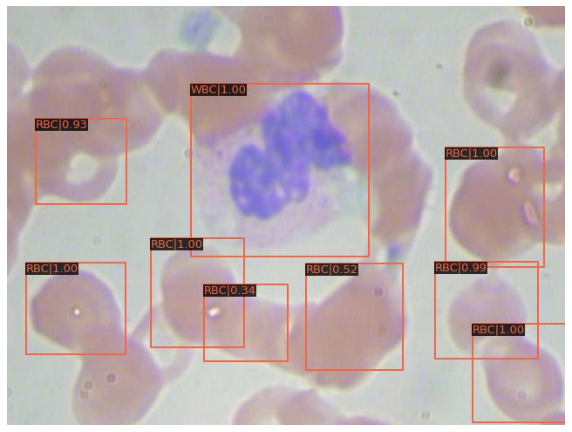

In [ ]:
# show_test_output 폴더에 있는 결과물 확인
import cv2
import matplotlib.pyplot as plt

output_img = cv2.imread('/content/show_test_output/BloodImage_00007.jpg')
output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(output_img)
plt.axis('off')
plt.show()

In [ ]:
# 모델의 성능 평가
dataset.evaluate(outputs)


Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.60s).
Accumulating evaluation results...
DONE (t=0.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.570
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.871
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.649
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.446
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.415
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.440
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.659
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.659
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.659
 Average Recall     (AR) @[ IoU=0.50:0.95 

OrderedDict([('bbox_mAP', 0.57),
             ('bbox_mAP_50', 0.871),
             ('bbox_mAP_75', 0.649),
             ('bbox_mAP_s', 0.446),
             ('bbox_mAP_m', 0.415),
             ('bbox_mAP_l', 0.44),
             ('bbox_mAP_copypaste', '0.570 0.871 0.649 0.446 0.415 0.440')])